In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier


In [2]:
# !pip install xgboost
from xgboost import XGBClassifier

## Loading data

In [3]:
df = pd.read_csv('credit_train.csv')

In [4]:
# shape of the dataset
print(df.shape)

(100514, 19)


In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
df.describe(include=['O'])

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


## Pre-processing

In [9]:
# drop rows which have fewer than 9 non-null values
df = df.dropna(thresh=9)

In [10]:
df.shape

(100000, 19)

In [11]:
# number of duplicated entries
df.duplicated().sum()

10215

In [12]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(89785, 19)

In [14]:
# Handling missing values
def missing_values_table(df):
        
        # Make a table with the results
        missing_table = pd.concat([df.isnull().sum(), 100 * df.isnull().sum() / len(df)], axis=1)
        
        # Rename the columns
        missing_table = missing_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missing_table = missing_table[
            missing_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return missing_table

In [15]:
missing_values_table(df)

,Missing Values,% of Total Values
Months since last delinquent,48337,53.8
Credit Score,19154,21.3
Annual Income,19154,21.3
Years in current job,3802,4.2
Bankruptcies,190,0.2
Tax Liens,9,0.0
Maximum Open Credit,2,0.0


In [16]:
# we can observe that "Months since last delinquent" column has missing values over 50%,
# so we can drop the column

df.drop(['Months since last delinquent'], axis=1, inplace=True)

In [17]:
# we can drop rows of "Maximum Open Credit", "Tax Liens", "Bankruptcies" as they are very less

df.dropna(subset=["Maximum Open Credit"] , inplace = True)

df.dropna(subset=["Tax Liens"] , inplace = True)

df.dropna(subset=["Bankruptcies"] , inplace = True)

In [18]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.3
Annual Income,19111,21.3
Years in current job,3802,4.2


In [19]:
# lets fill the missing values in "Years in current job" with mode of the column
# let's fill with mode value
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [20]:
# let's do some cleaning to Years in current job
df['Years in current job']=df['Years in current job'].str.extract(r"(\d+)") # using reg.exp to capture one or more digits
df['Years in current job'] =df['Years in current job'].astype(float)

In [21]:
df['Years in current job'].value_counts()

10.0    31528
1.0     13125
2.0      8227
3.0      7321
5.0      6128
4.0      5500
6.0      5125
7.0      4986
8.0      4110
9.0      3543
Name: Years in current job, dtype: int64

(array([6.5942e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.4000e+01, 7.0600e+02, 3.8000e+03]),
 array([ 585. , 1277.5, 1970. , 2662.5, 3355. , 4047.5, 4740. , 5432.5,
        6125. , 6817.5, 7510. ]),
 <BarContainer object of 10 artists>)

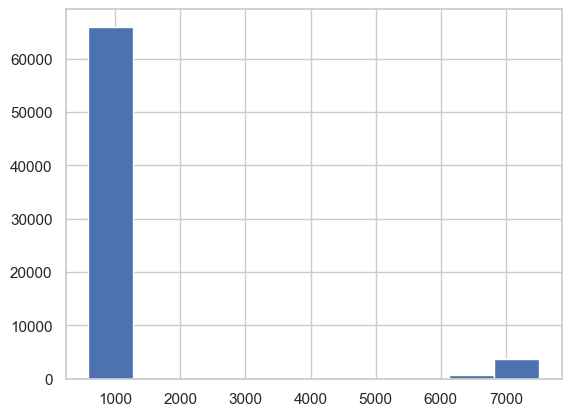

In [22]:
# Cleaning Credit Score column
plt.hist(df['Credit Score'])

### we can observe that some values of credit score is over 850, we know that credit score range is between 300-850

In [23]:
df[df['Credit Score']>850]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,5eee6c31-62d4-400c-a81f-37bd373db926,039ee8d2-3321-4683-9592-cb1a360c34e2,Charged Off,198572.0,Short Term,7420.0,526205.0,2.0,Rent,Debt Consolidation,9910.02,16.5,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,ce1f8220-7eba-4ec1-8bef-ca28f4916801,3e108ac9-9b7c-44a9-9289-e389cf3085b1,Charged Off,110924.0,Short Term,7070.0,804631.0,4.0,Rent,Debt Consolidation,11533.00,13.3,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,096471bd-820e-4d0e-88a7-d699a59ab87a,4cfda7f6-790e-4493-a9b1-4d35a8b63af9,Charged Off,175362.0,Short Term,6880.0,1060162.0,9.0,Rent,Debt Consolidation,16079.13,17.3,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,36da0533-8664-4156-8e96-f0d07966acdb,070e3aa9-d077-404c-8946-59ce976e0b70,Charged Off,88968.0,Short Term,6790.0,441845.0,1.0,Rent,other,5375.86,8.5,10.0,0.0,193306.0,535458.0,0.0,0.0


In [24]:
# we can see that this is problem due to worng data entry.
def credit_error(credit_value):
    credit_value['Credit Score'] = np.where(credit_value['Credit Score'] > 850, credit_value['Credit Score'].values /10, credit_value['Credit Score'])
    return credit_value

In [25]:
df = credit_error(df)

In [26]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.3
Annual Income,19111,21.3


/var/folders/r3/hvnb97vn0gg9k7mwf0zvtrz00000gn/T/ipykernel_41597/1067163612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit Score'])


<Axes: xlabel='Credit Score', ylabel='Density'>

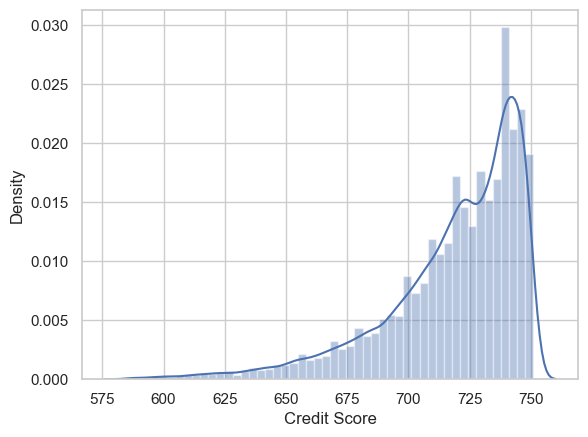

In [27]:
sns.distplot(df['Credit Score'])

/var/folders/r3/hvnb97vn0gg9k7mwf0zvtrz00000gn/T/ipykernel_41597/719998892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income'])


<Axes: xlabel='Annual Income', ylabel='Density'>

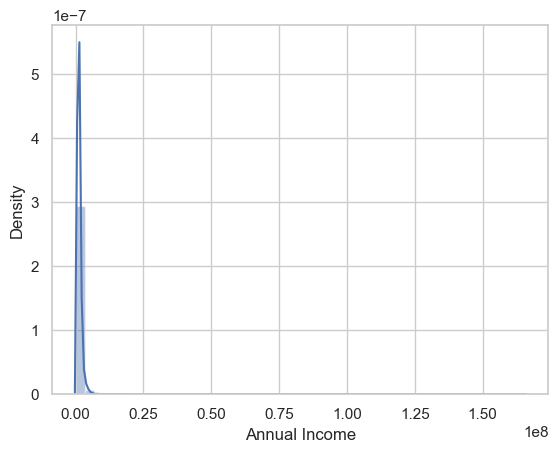

In [28]:
sns.distplot(df['Annual Income'])

#### from above plots we can observe that data is skewed, so filling missing values with median is better than mean

In [29]:
# let's fill with median
df['Credit Score'].fillna(df['Credit Score'].median(),inplace= True)

df['Annual Income'].fillna(df['Annual Income'].median(),inplace= True)

#### Now lets drop the unwanted columns which have no importance to the analysis

In [30]:
df.drop(['Loan ID','Customer ID'],axis=1, inplace=True)

In [31]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [32]:
df.shape

(89593, 16)

## Exploratory Data Analysis

### Target value distribution

<Axes: >

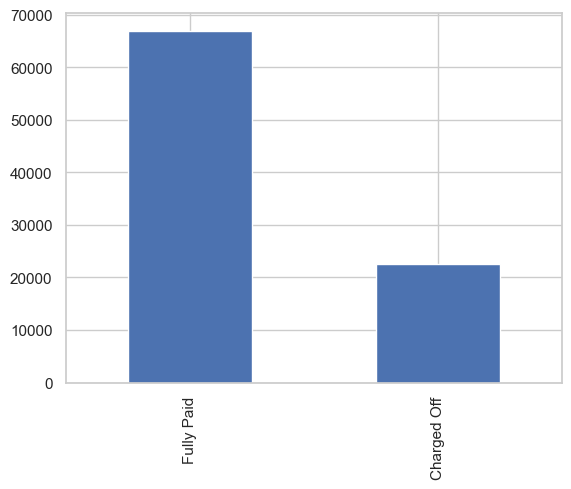

In [33]:
df['Loan Status'].value_counts().plot(kind='bar')

In [34]:
print(df['Loan Status'].value_counts())

Fully Paid     67006
Charged Off    22587
Name: Loan Status, dtype: int64


We can observe that "Loan Status" column in totally imbalanced. we need to perform class balancing
we can use random undersampling, over sampling or SMOTE methods. We will do this later.

### Term distribution

<Axes: >

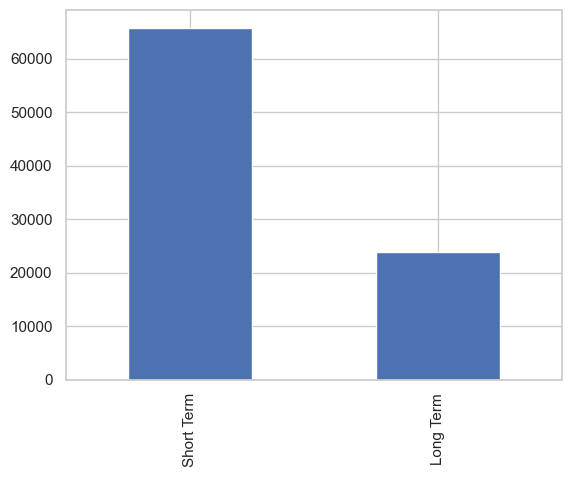

In [35]:
df['Term'].value_counts().plot(kind='bar')

We can observe that most of the term are 'Short Term'

### Term vs Loan Status

<Axes: xlabel='Term', ylabel='count'>

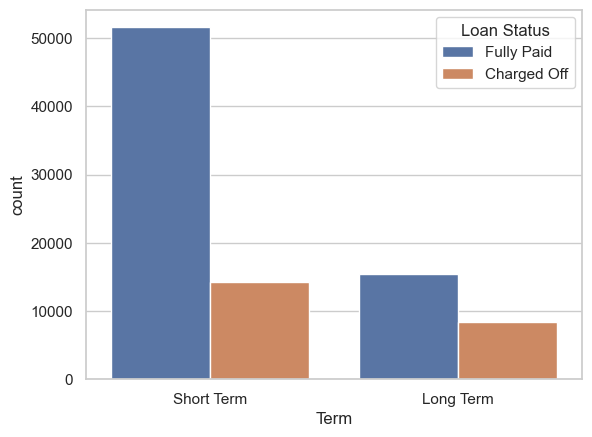

In [36]:
sns.countplot(data=df,x='Term',hue='Loan Status')

### Years in current job vs. Loan status

<Axes: xlabel='Years in current job', ylabel='count'>

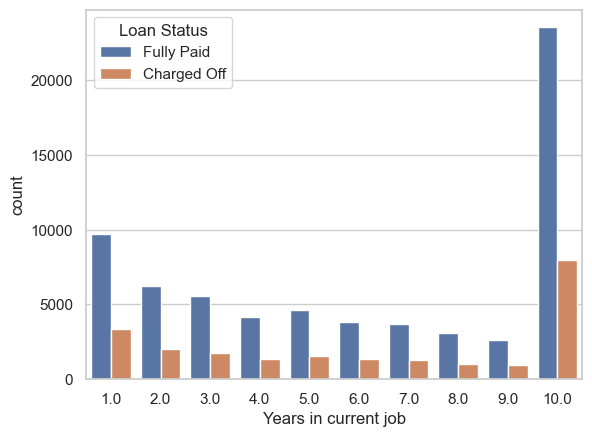

In [37]:
sns.countplot(data=df,x='Years in current job',hue='Loan Status')

loan status is 'Charged Off' highest for people have 10+ years in thier current job, this is same for 'Fully Paid'

### Purpose distribution

In [38]:
df['Purpose'].value_counts()

Debt Consolidation      70724
Home Improvements        5226
other                    5210
Other                    2874
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

We can observe that 'Other' is repeated twice with different spelling

In [39]:
df['Purpose'] = df.Purpose.str.replace('other','Other')
df['Purpose'].value_counts()

Debt Consolidation      70724
Other                    8084
Home Improvements        5226
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

Text(0.5, 1.0, 'Purpose for taking Loan')

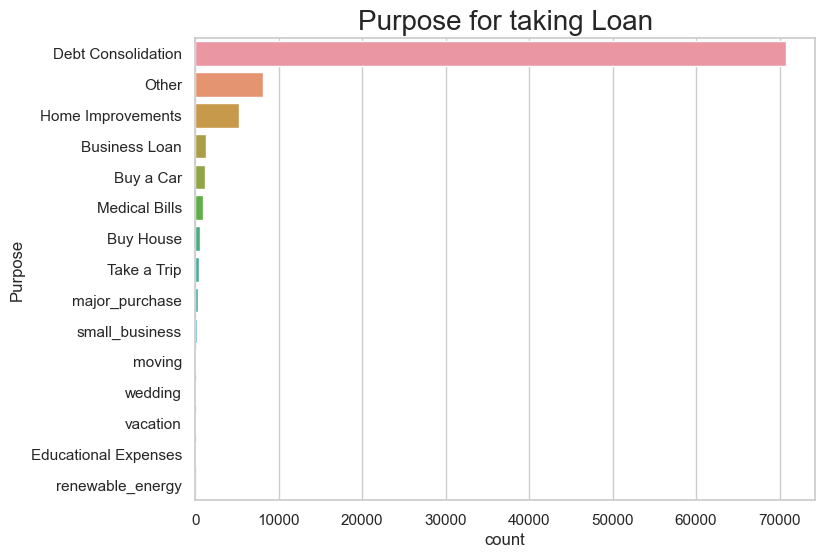

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df, order = df['Purpose'].value_counts().index)
plt.title('Purpose for taking Loan' , fontdict={'fontsize':20})

We can observe that the main 'Purpose' for taking loan is for 'Debt Consolidation', followed by 'Other', 'Home Improvement'

### Home Ownership distribution

In [41]:
df['Home Ownership'].value_counts()

Home Mortgage    43479
Rent             37750
Own Home          8182
HaveMortgage       182
Name: Home Ownership, dtype: int64

<Axes: xlabel='Home Ownership', ylabel='count'>

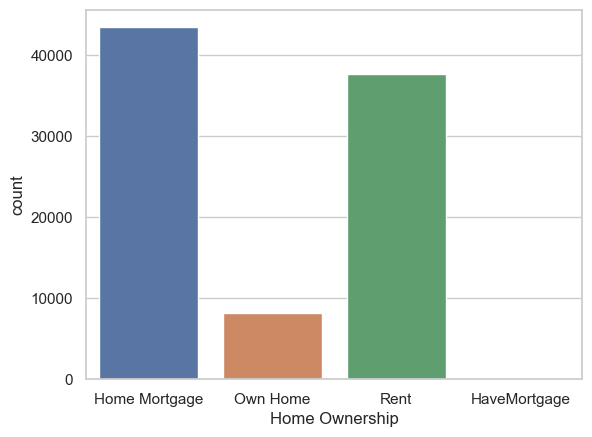

In [42]:
sns.countplot(data=df,x='Home Ownership')

we can see the 'Home Mortgage' and 'Rent' is more than others

### Home Ownership VS Loan Status

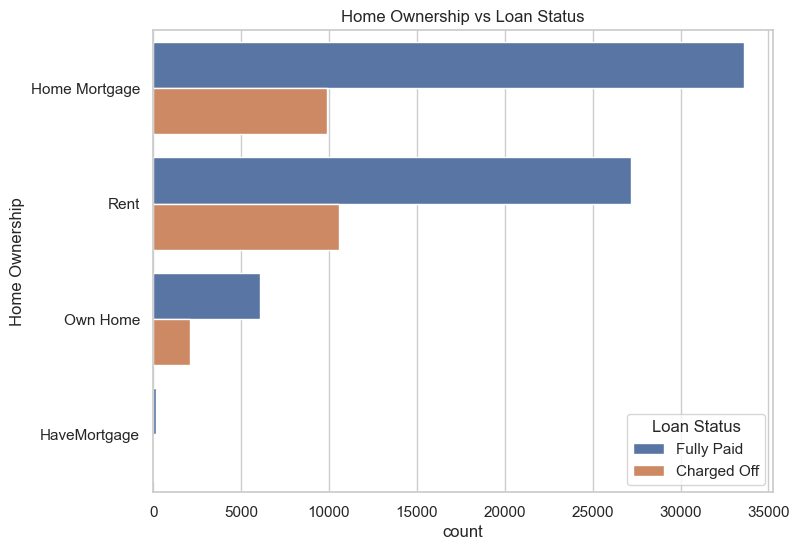

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='Home Ownership', order = df['Home Ownership'].value_counts().index,
              hue='Loan Status')
plt.title('Home Ownership vs Loan Status')
plt.legend(title="Loan Status", loc="lower right");

### Heatmap

<Axes: >

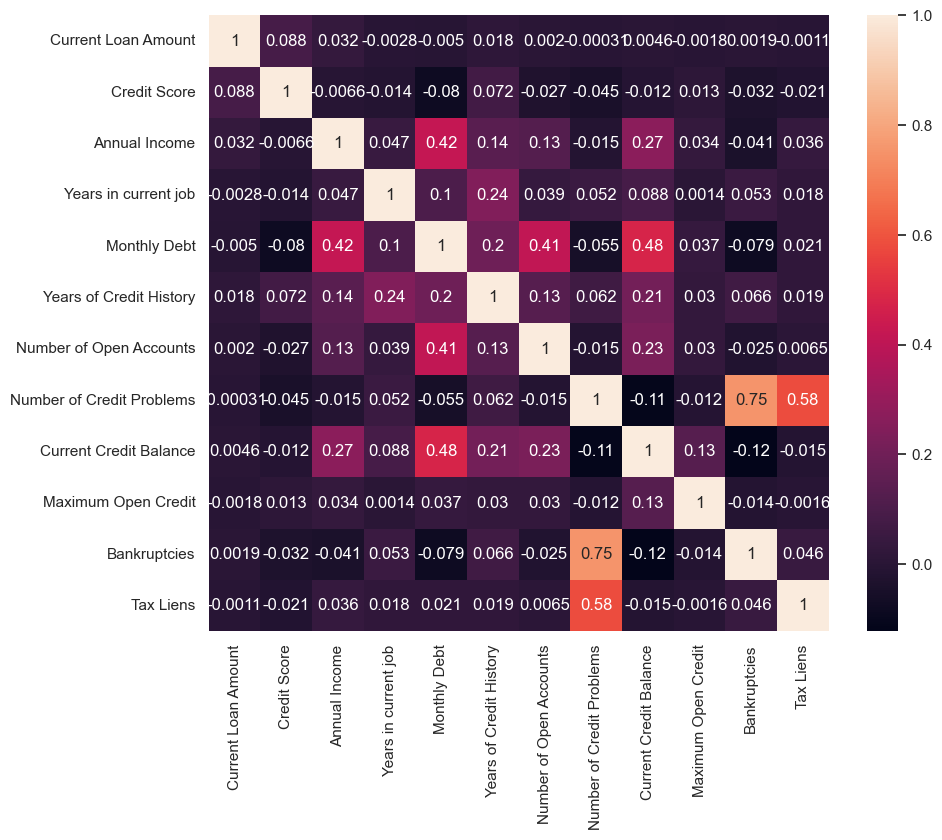

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

We can observe that 'Number of credit problems' and 'Bankruptcies' have high correlation of 0.75, followed by 'Number of credit problems' and 'Tax Liens' have high correlation of 0.58, 'Current Credit Balance' and 'Monthly Debt' have correlation of 0.48

### Label Encoding the categorical column

In [45]:
le = LabelEncoder()
categorical_columns = ['Loan Status','Term','Home Ownership','Purpose']

In [46]:
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']
['Long Term' 'Short Term']
['HaveMortgage' 'Home Mortgage' 'Own Home' 'Rent']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'renewable_energy'
 'small_business' 'vacation' 'wedding']


In [47]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### Check for multi-collinearity

In [48]:
# compute VIF
def compute_vif(considered_features,df):
    
    x = df[considered_features]
    # the calculation of variance inflation requires a constant
    x['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif = vif[vif['Variable']!='intercept']
    return vif

In [49]:
# compute vif to check collinearty between features
compute_vif(list(df.columns[1:]),df).sort_values('VIF', ascending=False)

,Variable,VIF
10,Number of Credit Problems,7.528576
13,Bankruptcies,4.982354
14,Tax Liens,3.259447
7,Monthly Debt,1.720071
11,Current Credit Balance,1.375611
1,Term,1.270730
2,Credit Score,1.266057
3,Annual Income,1.241102
9,Number of Open Accounts,1.219199
8,Years of Credit History,1.155849


We can observe that majority of the columns have acceptable VIF values of < 5, Number of Credit Problems is ~7 is still acceptable considering it is not very high of vif > 10.

### train test split

In [50]:
X = df.drop(['Loan Status'], axis=1).values
y = df['Loan Status'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state= 100)

In [52]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (71674, 15)
y_train: (71674,)
X_test:  (17919, 15)
y_test:  (17919,)


In [53]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### Scaling

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

### Modelling

In [56]:
rf = RandomForestClassifier(n_estimators=50, random_state=100)

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [58]:
print(rf.score(X_train , y_train))

0.9999441917571226


In [59]:
y_pred = rf.predict(X_test)

In [60]:
print(accuracy_score(y_test,y_pred))

0.746916680618338


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  577  3914]
 [  621 12807]]


#### we can observe that the model is over-fitting since our classes are imbalanced


We can use many ways to handle this:
1. Random over sampling
2. Random Under sampling
3. SMOTE
4. SMOTETomek

Text(0.5, 1.0, 'Loan status value count')

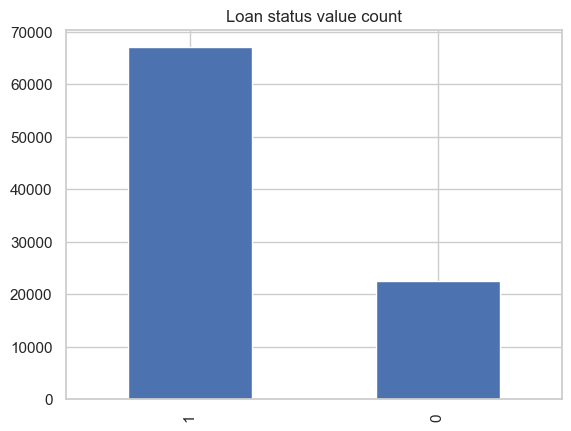

In [62]:
df['Loan Status'].value_counts().plot(kind='bar')
plt.title('Loan status value count')

In [63]:
df['Loan Status'].value_counts()

1    67006
0    22587
Name: Loan Status, dtype: int64

In [64]:
# Divide by class
df_class_0 = df[df['Loan Status'] == 0]
df_class_1 = df[df['Loan Status'] == 1]

In [65]:
!pip install -U imbalanced-learn

### Random Over Sampling

In [66]:
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

In [67]:
# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [68]:
print("Random Oversampling:")
print(pd.Series(y_ros).value_counts())

Random Oversampling:
1    67006
0    67006
Name: Loan Status, dtype: int64


In [69]:
rf = RandomForestClassifier(n_estimators=50, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.2,random_state= 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [70]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8903107861060329
[[12464   915]
 [ 2025 11399]]


### Random UnderSampling

In [71]:
# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [72]:
rf = RandomForestClassifier(n_estimators=50, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.2,random_state= 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [73]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.6302158273381295
[[3262 1224]
 [2117 2432]]


### SMOTE

In [74]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [75]:
rf = RandomForestClassifier(n_estimators=50, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2,random_state= 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8125209864567399
[[10477  2902]
 [ 2123 11301]]


### SMOTETomek

In [77]:
smt = SMOTETomek()
X_smt1, y_smt1 = smt.fit_resample(X, y)

In [78]:
y_smt1.value_counts()

1    64021
0    64021
Name: Loan Status, dtype: int64

In [79]:
rf = RandomForestClassifier(n_estimators=50, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X_smt1, y_smt1, test_size=0.2,random_state= 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [80]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8144402358545824
[[10263  2691]
 [ 2061 10594]]


##### Here observing the results we can see that random oversampling is giving far better results when compared to others, but by using this method there is good chance that the minority class are duplicated to increase the number and the model might be predicting based on values present in both training and test set. So I would prefer using the values from SMOTETomek method because it gives better chance of not duplicating the values and the results would be better.

### Logistic Regression

In [81]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [82]:
y_pred_lr = lr.predict(X_test)

In [83]:
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.6153695966261861
              precision    recall  f1-score   support

           0       0.57      0.93      0.71     12954
           1       0.81      0.29      0.43     12655

    accuracy                           0.62     25609
   macro avg       0.69      0.61      0.57     25609
weighted avg       0.69      0.62      0.57     25609



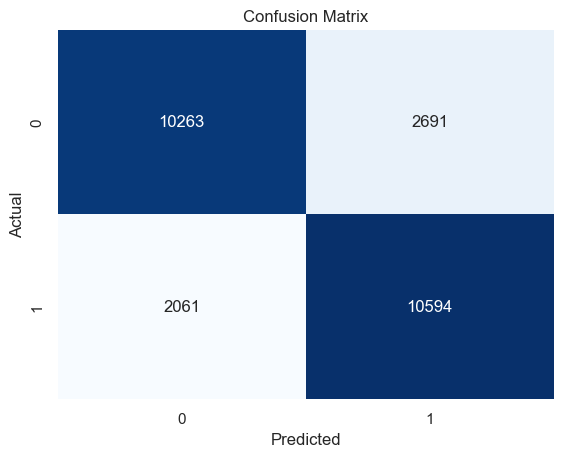

[[10263  2691]
 [ 2061 10594]]


In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### KNN

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred_knn = knn.predict(X_test)

In [87]:
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7460658362294506
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     12954
           1       0.82      0.63      0.71     12655

    accuracy                           0.75     25609
   macro avg       0.76      0.74      0.74     25609
weighted avg       0.76      0.75      0.74     25609



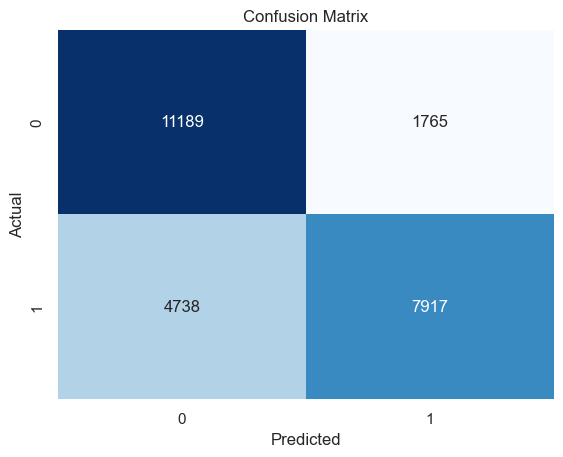

[[11189  1765]
 [ 4738  7917]]


In [88]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### Naive Bayes

In [89]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [90]:
y_pred_nb = nb.predict(X_test)

In [91]:
print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.5972119176851888
              precision    recall  f1-score   support

           0       0.56      1.00      0.71     12954
           1       0.99      0.19      0.31     12655

    accuracy                           0.60     25609
   macro avg       0.78      0.59      0.51     25609
weighted avg       0.77      0.60      0.52     25609



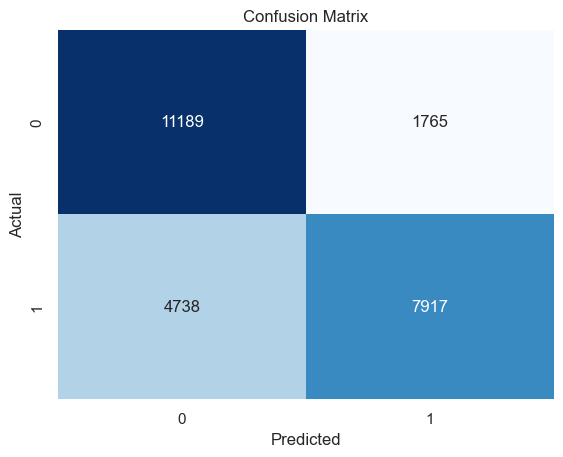

[[11189  1765]
 [ 4738  7917]]


In [92]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### XGBoost classifier

In [93]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [94]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred_xgb))
print(f1_score(y_test,y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.8211956733960717
0.8373992400838038
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     12954
           1       0.76      0.93      0.84     12655

    accuracy                           0.82     25609
   macro avg       0.84      0.82      0.82     25609
weighted avg       0.84      0.82      0.82     25609



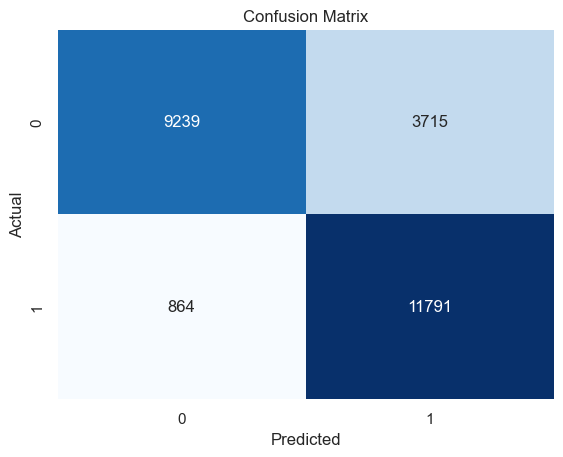

[[ 9239  3715]
 [  864 11791]]


In [96]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### Random Forest classifier

In [97]:
rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [98]:
y_pred_rf = rf.predict(X_test)

In [99]:
print(accuracy_score(y_test,y_pred_rf))
print(f1_score(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.8168222109414659
0.820714695203516
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     12954
           1       0.79      0.85      0.82     12655

    accuracy                           0.82     25609
   macro avg       0.82      0.82      0.82     25609
weighted avg       0.82      0.82      0.82     25609



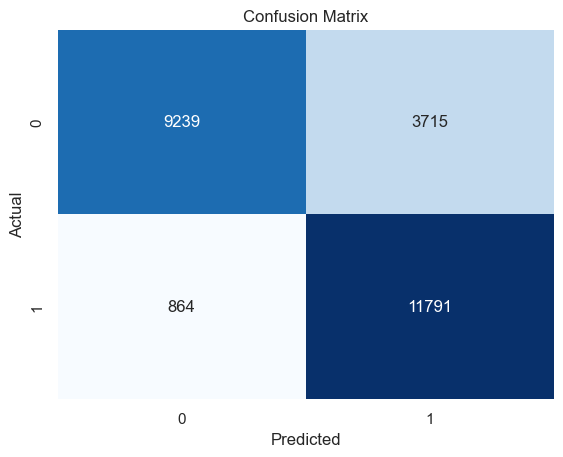

[[ 9239  3715]
 [  864 11791]]


In [100]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

#### We can observe that xgboost classifier has the highest accuracy = 0.8238 and f1 score = 0.8402, followed very closely by Random forest classifier with accuracy = 0.8168 and f1 score = 0.8212. The rest of the models, including KNN, Naive Bayes, Logistic Regression, have low accuracy and f1 scores in classifying 'Loan Status'.

In [101]:
from sklearn.ensemble import StackingClassifier

In [107]:
base_estimators = [('RandomForest', rf), ('XGBoost', xgb_classifier)]
stacked_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(random_state=42))

In [108]:
stacked_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('RandomForest',
                                RandomForestClassifier(random_state=100)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=No...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(random_state=42))

In [109]:
stacked_y_pred = stacked_classifier.predict(X_test)

In [110]:
print(accuracy_score(y_test,stacked_y_pred))
print(f1_score(y_test,stacked_y_pred))
print(classification_report(y_test, stacked_y_pred))

0.8293568667265414
0.8366355140186915
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     12954
           1       0.79      0.88      0.84     12655

    accuracy                           0.83     25609
   macro avg       0.83      0.83      0.83     25609
weighted avg       0.83      0.83      0.83     25609



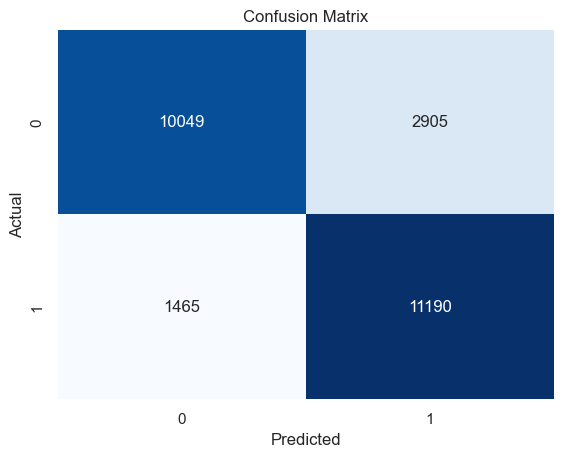

[[10049  2905]
 [ 1465 11190]]


In [111]:
cm = confusion_matrix(y_test, stacked_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

In [126]:
base_estimators_all = [('RandomForest', rf), ('XGBoost', xgb_classifier),('Logistic',lr),('KNN',knn),('NB',nb)]
stacked_classifier_all = StackingClassifier(estimators=base_estimators_all, final_estimator=LogisticRegression(random_state=42))

In [127]:
stacked_classifier_all.fit(X_train, y_train)

StackingClassifier(estimators=[('RandomForest',
                                RandomForestClassifier(random_state=100)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=No...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('Logistic', LogisticRegression()),
                               ('KNN', KNeighborsClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression(random_state=42))

In [128]:
stacked_y_pred_all = stacked_classifier_all.predict(X_test)

In [129]:
print(accuracy_score(y_test, stacked_y_pred_all))
print(f1_score(y_test, stacked_y_pred_all))
print(classification_report(y_test, stacked_y_pred_all))

0.8420086688273654
0.8466959684752955
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     12954
           1       0.81      0.88      0.85     12655

    accuracy                           0.84     25609
   macro avg       0.84      0.84      0.84     25609
weighted avg       0.84      0.84      0.84     25609



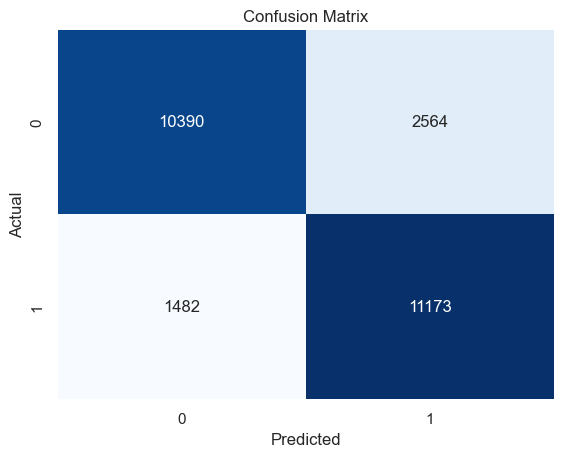

[[10390  2564]
 [ 1482 11173]]


In [130]:
cm = confusion_matrix(y_test, stacked_y_pred_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### Conclusion:
#### We can observe that perform stack ensemble of all the models has provided highest accuracy = 0.8420 and f1 score = 0.8466. This is the best model that we can use to classify and predict 'Loan Status' based on the given variables.